In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('car_data.csv')

In [ ]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
df.drop(["Engine Fuel Type", "Market Category", "Vehicle Style", "Popularity", "Number of Doors", "Vehicle Size"], axis = 1, inplace = True)

In [ ]:
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [ ]:
df.columns = ['Make', 'Model', 'Year', 'Hp', 'Cylinders', 'Transmission', 'Drive_Mode', 'MPG_H', 'MPG_C', 'Price']

In [ ]:
df.head()

,Make,Model,Year,Hp,Cylinders,Transmission,Drive_Mode,MPG_H,MPG_C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [ ]:
df[df.duplicated()]

,Make,Model,Year,Hp,Cylinders,Transmission,Drive_Mode,MPG_H,MPG_C,Price
14,BMW,1 Series,2013,230.0,6.0,MANUAL,rear wheel drive,28,19,31500
18,Audi,100,1992,172.0,6.0,MANUAL,front wheel drive,24,17,2000
20,Audi,100,1992,172.0,6.0,MANUAL,front wheel drive,24,17,2000
24,Audi,100,1993,172.0,6.0,MANUAL,front wheel drive,24,17,2000
25,Audi,100,1993,172.0,6.0,MANUAL,front wheel drive,24,17,2000
...,...,...,...,...,...,...,...,...,...,...
11481,Suzuki,X-90,1998,95.0,4.0,MANUAL,four wheel drive,26,22,2000
11603,Volvo,XC60,2017,302.0,4.0,AUTOMATIC,all wheel drive,29,20,46350
11604,Volvo,XC60,2017,240.0,4.0,AUTOMATIC,front wheel drive,30,23,40950
11708,Suzuki,XL7,2008,252.0,6.0,AUTOMATIC,all wheel drive,22,15,29149


#### Removing duplicates

In [ ]:
df = df.drop_duplicates()

In [ ]:
df[df.duplicated()]

,Make,Model,Year,Hp,Cylinders,Transmission,Drive_Mode,MPG_H,MPG_C,Price



#### Identifying the categorical and the numerical features in the dataset

In [ ]:
categorical_features = df.select_dtypes(include=['object'])
print(categorical_features.columns.tolist())

['Make', 'Model', 'Transmission', 'Drive_Mode']


In [ ]:
numerical_features = df.select_dtypes(exclude=['object'])
print(numerical_features.columns.tolist())

['Year', 'Hp', 'Cylinders', 'MPG_H', 'MPG_C', 'Price']


#### Identifying the columns which have missing values and imputing them accordingly.

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
columns_with_missing_values = df.columns[df.isnull().any()].tolist()

In [ ]:
imputation_strategies = {}
for column in columns_with_missing_values:
    if df[column].dtype == 'object':
        imputation_strategies[column] = 'most_frequent'
    else:
        imputation_strategies[column] = 'mean'
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print(df_imputed.head())

  Make       Model  Year     Hp Cylinders Transmission        Drive_Mode  \
0  BMW  1 Series M  2011  335.0       6.0       MANUAL  rear wheel drive   
1  BMW    1 Series  2011  300.0       6.0       MANUAL  rear wheel drive   
2  BMW    1 Series  2011  300.0       6.0       MANUAL  rear wheel drive   
3  BMW    1 Series  2011  230.0       6.0       MANUAL  rear wheel drive   
4  BMW    1 Series  2011  230.0       6.0       MANUAL  rear wheel drive   

  MPG_H MPG_C  Price  
0    26    19  46135  
1    28    19  40650  
2    28    20  36350  
3    28    18  29450  
4    28    18  34500  


#### Identifying the outliers in the price column using IQR technique and creating a column called is_outlier to clearly flag the outliers without dropping them from the dataset.

In [ ]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
outlier = 1.5 * IQR

In [ ]:
outlier_lower = Q1 - 1.5 * IQR
outlier_upper = Q3 + 1.5 * IQR

In [ ]:
df['is_outlier'] = ~df['Price'].between(outlier_lower, outlier_upper)

In [ ]:
df.head()

,Make,Model,Year,Hp,Cylinders,Transmission,Drive_Mode,MPG_H,MPG_C,Price,is_outlier
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135,False
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650,False
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350,False
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450,False
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500,False


#### Standardizing the numerical columns either using Min-Max or Standard scaling method.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

In [ ]:
min_max_scaler = MinMaxScaler()
df[numerical_columns] = min_max_scaler.fit_transform(df[numerical_columns])

In [ ]:
df.head()

,Make,Model,Year,Hp,Cylinders,Transmission,Drive_Mode,MPG_H,MPG_C,Price,is_outlier
0,BMW,1 Series M,0.777778,0.295983,0.375,MANUAL,rear wheel drive,0.040936,0.092308,0.021384,False
1,BMW,1 Series,0.777778,0.258985,0.375,MANUAL,rear wheel drive,0.046784,0.092308,0.018727,False
2,BMW,1 Series,0.777778,0.258985,0.375,MANUAL,rear wheel drive,0.046784,0.100000,0.016643,False
3,BMW,1 Series,0.777778,0.184989,0.375,MANUAL,rear wheel drive,0.046784,0.084615,0.013300,False
4,BMW,1 Series,0.777778,0.184989,0.375,MANUAL,rear wheel drive,0.046784,0.084615,0.015747,False


### histogram of Car make with its frequency

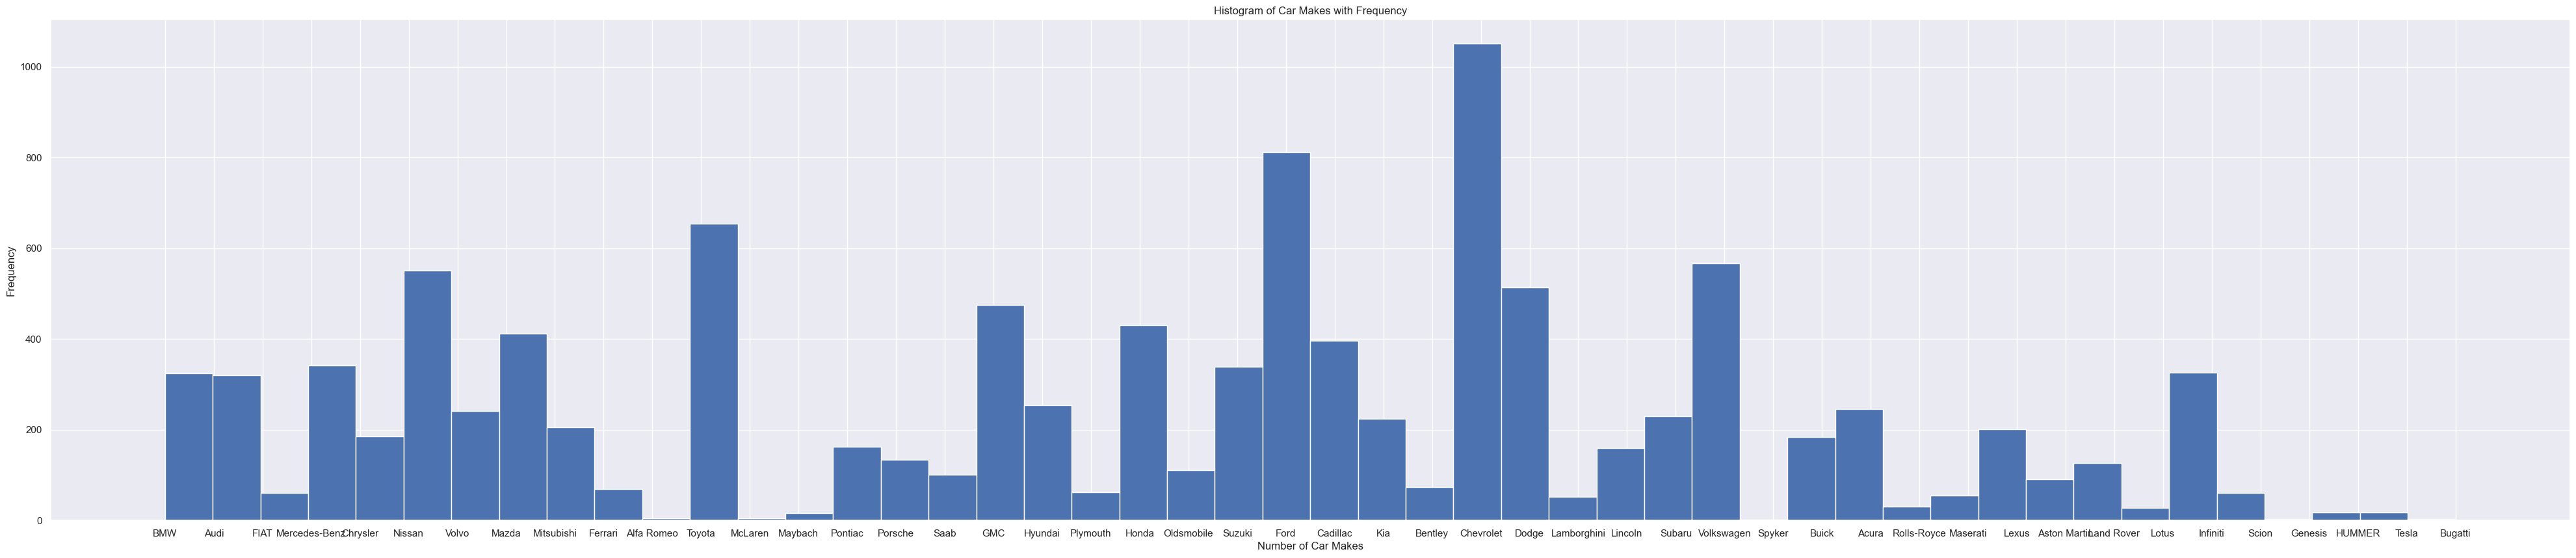

In [ ]:
counts = df['Make'].value_counts()
plt.figure(figsize=(50,10))
plt.hist(df['Make'], bins=len(counts))
plt.title('Histogram of Car Makes with Frequency')
plt.xlabel('Number of Car Makes')
plt.ylabel('Frequency')
plt.show()


#### Creating a heat map of all numerical columns

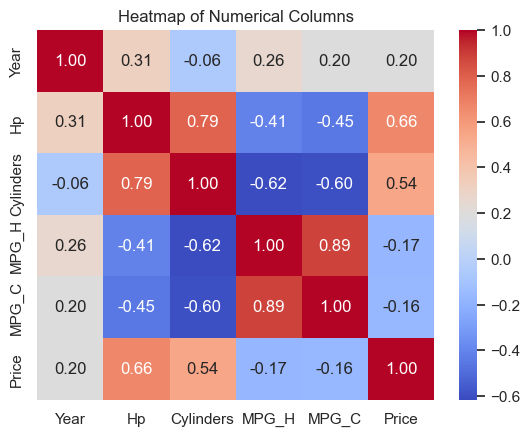

In [ ]:
numerical_columns = df.select_dtypes(include=['int', 'float'])
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Numerical Columns')
plt.show()

#### Creating scatterplot between HP and Price

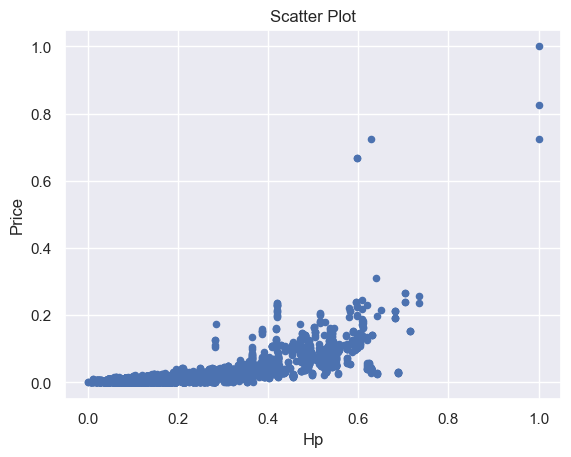

In [ ]:
df.plot.scatter(x='Hp', y='Price')
plt.title('Scatter Plot')
plt.xlabel('Hp')
plt.ylabel('Price')
plt.grid(True)
plt.show()

#### Creating new features by transforming the following columns -

#### Feature	Transformation	Feature type
#### 1.	price	Log	Numerical
#### 2.	city_mpg	BoxCox	Numerical
#### 3.	make	One-hot encoding	Categorical


In [ ]:
df['price_log'] = np.log(df['Price'])
df['price_log'].head()

0   -3.845101
1   -3.977807
2   -4.095752
3   -4.319987
4   -4.151114
Name: price_log, dtype: float64

In [ ]:
constant = 0.001
df['city_mpg_positive'] = df['MPG_C'] + constant
df['city_mpg_boxcox'], lda = boxcox(df['city_mpg_positive'])
df['city_mpg_boxcox'].head()

0   -2.586564
1   -2.586564
2   -2.492851
3   -2.688952
4   -2.688952
Name: city_mpg_boxcox, dtype: float64

In [ ]:
df = pd.get_dummies(df, columns=['Make'])

In [ ]:
df.head()

,Model,Year,Hp,Cylinders,Transmission,Drive_Mode,MPG_H,MPG_C,Price,is_outlier,...,Make_Rolls-Royce,Make_Saab,Make_Scion,Make_Spyker,Make_Subaru,Make_Suzuki,Make_Tesla,Make_Toyota,Make_Volkswagen,Make_Volvo
0,1 Series M,0.777778,0.295983,0.375,MANUAL,rear wheel drive,0.040936,0.092308,0.021384,False,...,False,False,False,False,False,False,False,False,False,False
1,1 Series,0.777778,0.258985,0.375,MANUAL,rear wheel drive,0.046784,0.092308,0.018727,False,...,False,False,False,False,False,False,False,False,False,False
2,1 Series,0.777778,0.258985,0.375,MANUAL,rear wheel drive,0.046784,0.100000,0.016643,False,...,False,False,False,False,False,False,False,False,False,False
3,1 Series,0.777778,0.184989,0.375,MANUAL,rear wheel drive,0.046784,0.084615,0.013300,False,...,False,False,False,False,False,False,False,False,False,False
4,1 Series,0.777778,0.184989,0.375,MANUAL,rear wheel drive,0.046784,0.084615,0.015747,False,...,False,False,False,False,False,False,False,False,False,False
